In [23]:
import pandas as pd
df = pd.read_csv('houseprice.csv')
#To show all columns

# import pandas as pd
# df = pd.read_csv('Week 11_Graded Mini Project_Dataset_houseprice.csv')


In [24]:
# print(df.head())
print("Missing values per column:\n", df.isnull().sum())
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Remaining missing values:\n", df.isnull().sum()[df.isnull().sum() > 0])

Missing values per column:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Remaining missing values:
 LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [25]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')

print("Remaining missing values:\n", df.isnull().sum()[df.isnull().sum() > 0])

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Initialize the scaler and scale the numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Remaining missing values:\n", df.isnull().sum())



Remaining missing values:
 LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64
Remaining missing values:
 Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 246, dtype: int64


In [26]:
import numpy as np

z_scores = np.abs((df['SalePrice'] - df['SalePrice'].mean()) / df['SalePrice'].std())
df = df[z_scores < 3]  # Remove outliers beyond 3 std dev



In [27]:
df['TotalBathrooms'] = df['FullBath'] + df['HalfBath']*0.5 + df['BsmtFullBath'] + df['BsmtHalfBath']*0.5
df['OverallQuality_SqFeet'] = df['OverallQual'] * df['GrLivArea']

print(df.head)

<bound method NDFrame.head of             Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.730865    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1    -1.728492   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2    -1.726120    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3    -1.723747    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4    -1.721374    0.073375     0.641972  0.375148     1.374795    -0.517200   
...        ...         ...          ...       ...          ...          ...   
1455  1.721374    0.073375    -0.357114 -0.260560    -0.071836    -0.517200   
1456  1.723747   -0.872563     0.687385  0.266407    -0.071836     0.381743   
1457  1.726120    0.309859    -0.175462 -0.147810     0.651479     3.078570   
1458  1.728492   -0.872563    -0.084636 -0.080160    -0.795151     0.381743   
1459  1.730865   -0.872563     0.233255 -0.058112    -0.795151     0.381743   

      YearBuilt  Year

In [28]:
df['Age_Bin'] = pd.cut(df['YearBuilt'], bins=[1870, 1950, 2000, 2010], labels=['Old', 'Mid', 'New'])
df['YearBuilt_bin'] = pd.cut(df['YearBuilt'], bins=[1870, 1940, 1970, 2000, 2020], labels=['Old', 'Mid', 'Recent', 'New'])
df = pd.get_dummies(df, columns=['YearBuilt_bin'], drop_first=True)

# The distribution of SalePrice is right-skewed, meaning most houses are sold at lower prices, with fewer houses sold at very high prices.
# A histogram or KDE plot of SalePrice typically shows a peak at lower values and a long tail towards higher prices.


/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


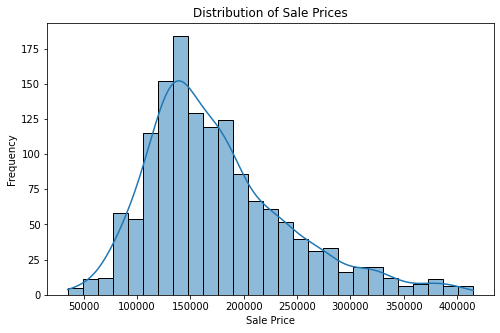

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()




In [30]:
# How do different features relate to sale price?
# OverallQual (Overall Quality): Strong positive correlation. Higher quality ratings lead to higher sale prices.
# GrLivArea (Above Ground Living Area): Houses with more living area tend to have higher sale prices.
# GarageCars and GarageArea: More garage space is associated with higher sale prices.
# TotalBsmtSF (Total Basement Area): Larger basements often increase sale price.
# Neighborhood: Some neighborhoods consistently have higher or lower sale prices.

SalePrice         1.000000
OverallQual       0.796343
GrLivArea         0.670485
GarageCars        0.651158
GarageArea        0.626092
TotalBathrooms    0.607426
TotalBsmtSF       0.582442
1stFlrSF          0.572255
YearBuilt         0.557339
FullBath          0.553524
Name: SalePrice, dtype: float64


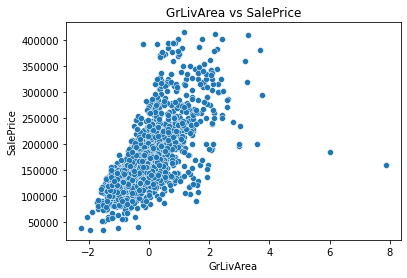

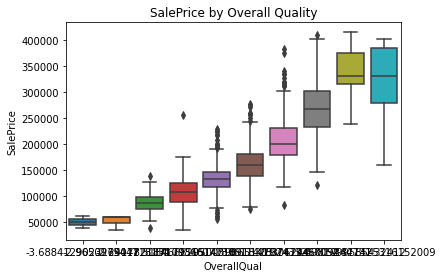

In [31]:
# Correlation with SalePrice
corr = df.corr()['SalePrice'].sort_values(ascending=False)
print(corr.head(10))


# Scatterplot example
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.show()


# Boxplot example
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice by Overall Quality')
plt.show()


In [32]:
#  Identify trends and patterns in the data
# Newer houses (higher YearBuilt) generally have higher sale prices.
# Neighborhood effect: Certain neighborhoods (e.g., 'NridgHt', 'NoRidge') have higher median sale prices.
# Quality and size: Both overall quality and size (living area, basement, garage) are strong predictors of price.
# Outliers: Some houses have unusually high or low prices for their size or quality, which may be due to unique features or conditions.

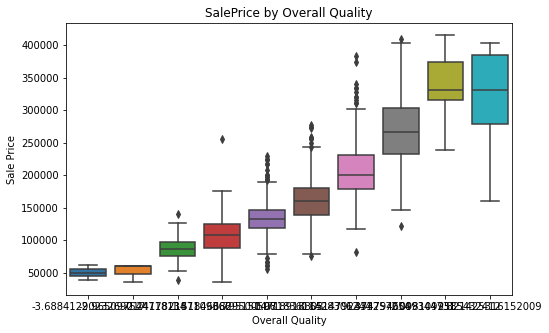

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

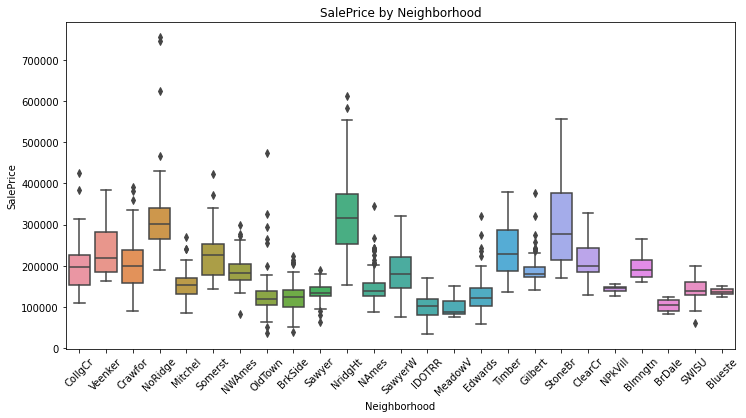

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

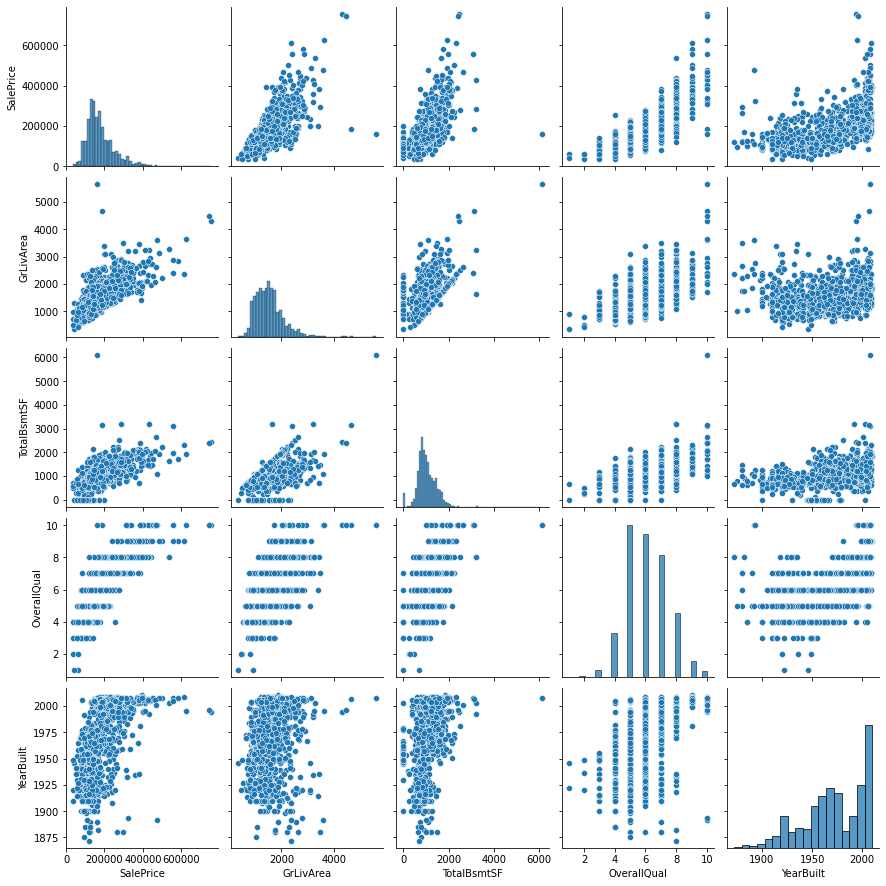

In [34]:

df_raw = pd.read_csv('houseprice.csv')

# Use df_raw for EDA plots
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_raw)
plt.xticks(rotation=45)
plt.title('SalePrice by Neighborhood')
plt.show()

# Pairplot for key features
sns.pairplot(df_raw[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt']])
plt.show()


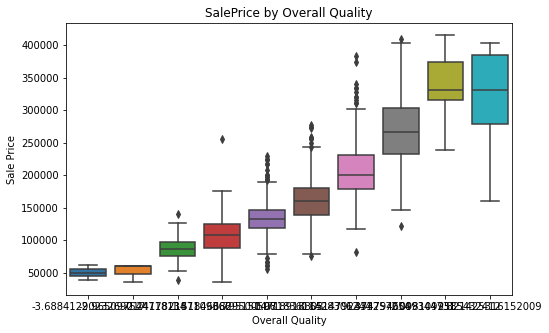

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Convert all category columns to string
for col in X_train.select_dtypes(include='category').columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# One-hot encode object columns
object_cols = X_train.select_dtypes(include='object').columns
X_train = pd.get_dummies(X_train, columns=object_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=object_cols, drop_first=True)

# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Now all columns are numeric, so fillna and astype(float) will work
X_train = X_train.fillna(0).astype(float)
X_test = X_test.fillna(0).astype(float)



In [38]:

!pip install --upgrade pandas dask
!pip install --upgrade dask xarray pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [39]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [40]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = {
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = preds


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3657
[LightGBM] [Info] Number of data points in the train set: 1150, number of used features: 157
[LightGBM] [Info] Start training from score 176995.866957


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for name, preds in results.items():
    print(f"{name}:")
    print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("  MAE:", mean_absolute_error(y_test, preds))
    print("  R2:", r2_score(y_test, preds))


XGBoost:
  RMSE: 28196.780511635297
  MAE: 17791.090738932293
  R2: 0.8164801108135882
LightGBM:
  RMSE: 25887.796357667197
  MAE: 15956.706851504523
  R2: 0.845305719035987
CatBoost:
  RMSE: 23384.10125439527
  MAE: 13976.228720740975
  R2: 0.8737807902862933
